# Library

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from collections import Counter
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from sklearn.naive_bayes import GaussianNB

# Load Data

In [215]:
train=pd.read_csv("train_Wc8LBpr.csv")
test=pd.read_csv("test_VsU9xXK.csv")

# Data Analysis

In [3]:
train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [4]:
train.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


In [7]:
train1=train.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F2B1B96D8>,
      dtype=object)

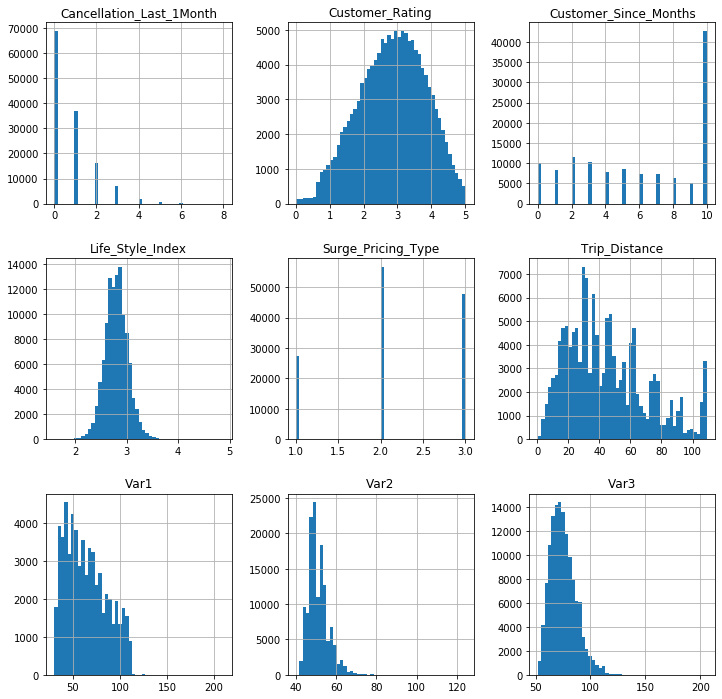

In [8]:
train1.hist(figsize=(12,12),bins=50)

(9.5, -0.5)

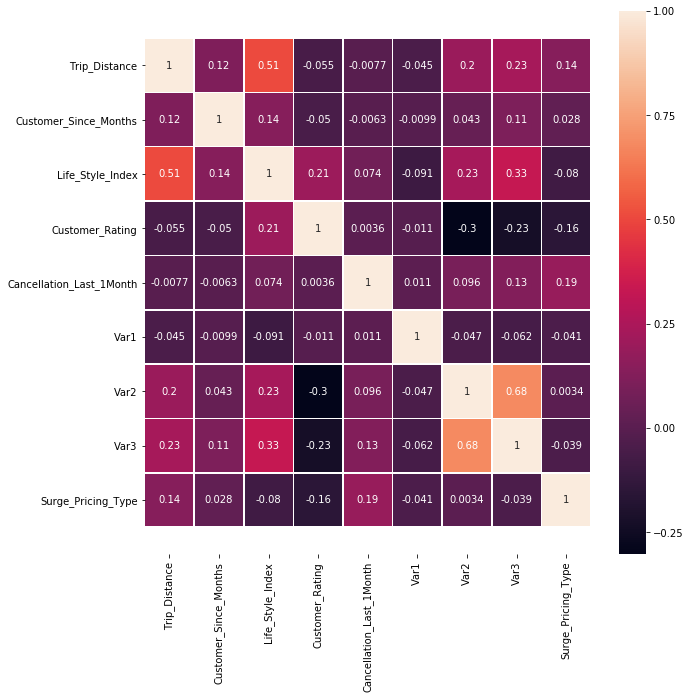

In [9]:
import sys
fig, ax = plt.subplots(figsize=(10,10))
ht=sns.heatmap(train1.corr(),annot=True,linewidths=0.5,ax=ax)
bottom,top=ht.get_ylim()
ht.set_ylim(bottom+0.5,top-0.5)

In [10]:
train1.isna().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [11]:
train1.Type_of_Cab.unique()

array(['B', nan, 'C', 'E', 'D', 'A'], dtype=object)

In [12]:
train1.Customer_Rating

0         3.90500
1         3.45000
2         3.50125
3         3.45375
4         3.40250
           ...   
131657    3.28500
131658    0.44500
131659    3.33625
131660    4.15750
131661    2.63875
Name: Customer_Rating, Length: 131662, dtype: float64

In [14]:
train1['Type_of_Cab'].fillna(train1['Type_of_Cab'].mode()[0],inplace=True)
train1['Life_Style_Index'].fillna(train1['Life_Style_Index'].mode()[0],inplace=True)
train1['Customer_Since_Months'].fillna(train1['Customer_Since_Months'].mode()[0],inplace=True)
train1['Confidence_Life_Style_Index'].fillna(train1['Confidence_Life_Style_Index'].mode()[0],inplace=True)
train1['Var1'].fillna(train1['Var1'].mode()[0],inplace=True)


In [15]:
train1.isna().sum()

Trip_ID                        0
Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

# Univariate Analysis

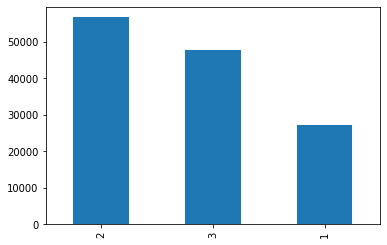

In [21]:
train1['Surge_Pricing_Type'].value_counts().plot.bar()

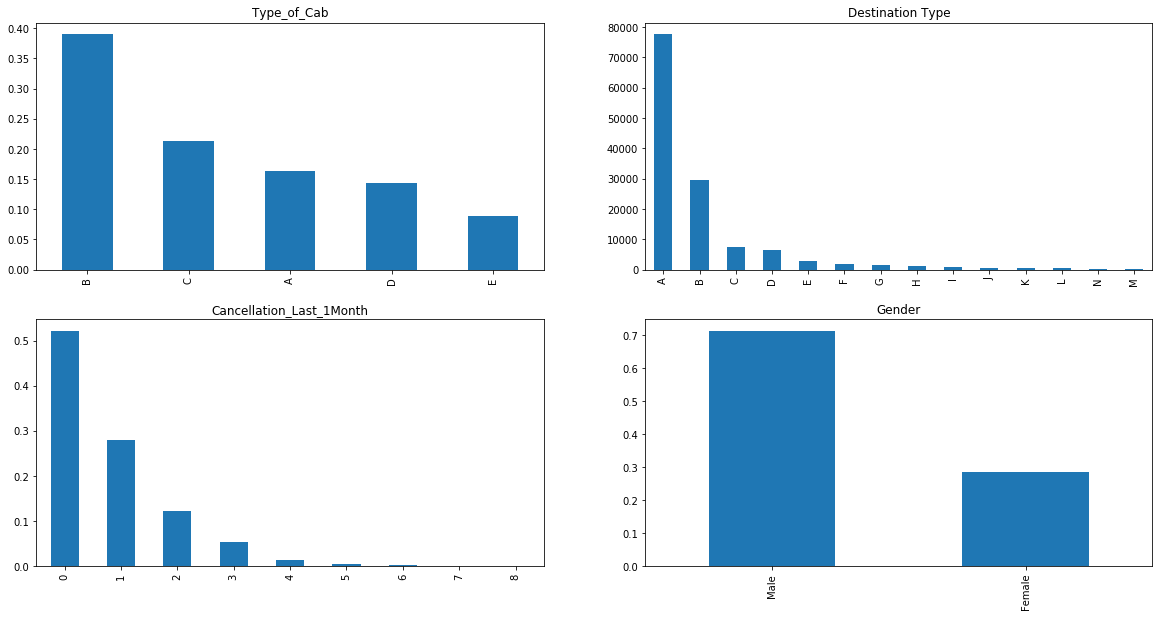

In [23]:
plt.subplot(221)
train1['Type_of_Cab'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Type_of_Cab")
plt.subplot(222)
train1['Destination_Type'].value_counts().plot.bar(figsize=(20,10),title="Destination Type")
plt.subplot(223)
train1['Cancellation_Last_1Month'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Cancellation_Last_1Month")
plt.subplot(224)
train1['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Gender")
plt.show()

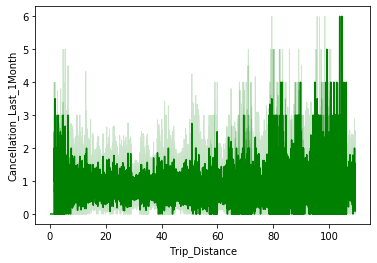

In [25]:
ax = sns.lineplot(x='Trip_Distance', y='Cancellation_Last_1Month', data=train1, color="g")

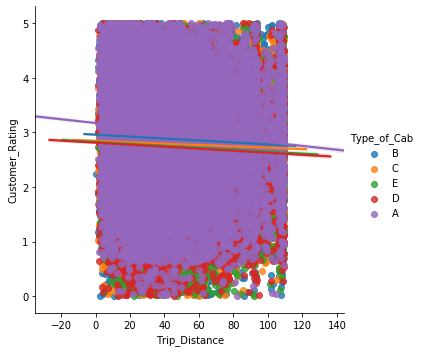

In [28]:
ax = sns.lmplot(x='Trip_Distance', y='Customer_Rating', data=train1, hue="Type_of_Cab")

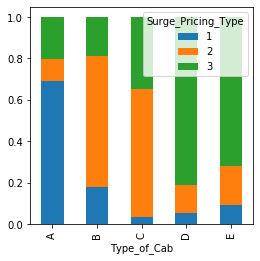

In [29]:
Type_of_Cab=pd.crosstab(train1['Type_of_Cab'],train['Surge_Pricing_Type'])
Type_of_Cab.div(Type_of_Cab.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

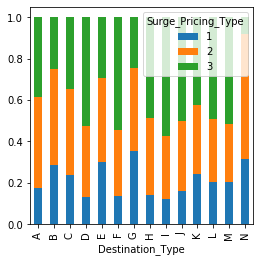

In [30]:
Destination_Type=pd.crosstab(train1['Destination_Type'],train['Surge_Pricing_Type'])
Destination_Type.div(Destination_Type.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

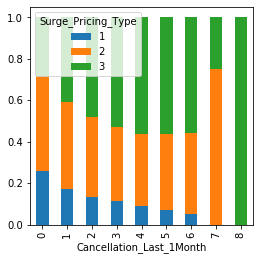

In [31]:
Cancellation_Last_1Month=pd.crosstab(train1['Cancellation_Last_1Month'],train['Surge_Pricing_Type'])
Cancellation_Last_1Month.div(Cancellation_Last_1Month.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

In [16]:
y=train1.Surge_Pricing_Type

In [17]:
train1.drop(['Surge_Pricing_Type','Trip_ID'],axis=1,inplace=True)

In [18]:
X=train1

In [19]:
X=pd.get_dummies(X)

# Feature Selection

In [47]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

                            Specs         Score
0                   Trip_Distance  47142.667003
8                   Type_of_Cab_A  31355.345437
11                  Type_of_Cab_D  16590.773022
9                   Type_of_Cab_B   9314.857687
12                  Type_of_Cab_E   6475.729306
4        Cancellation_Last_1Month   6388.461888
10                  Type_of_Cab_C   6148.023336
5                            Var1   3871.617219
13  Confidence_Life_Style_Index_A   3118.187124
17             Destination_Type_B   2014.286647


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.11489517 0.06439388 0.1011153  0.10847725 0.04335154 0.07007238
 0.09029714 0.09906274 0.09619939 0.05343008 0.02375522 0.05562438
 0.02308809 0.00720485 0.00688606 0.00345934 0.00397808 0.00693027
 0.00271997 0.00360996 0.00166842 0.00171483 0.00142423 0.00107317
 0.00115467 0.00083822 0.00094785 0.00100126 0.00025673 0.00021958
 0.005467   0.00568294]


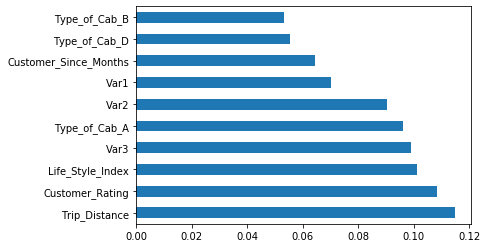

In [48]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Picked 6 best features based on the Score 

In [199]:
X1=X[['Trip_Distance','Type_of_Cab_A','Cancellation_Last_1Month','Type_of_Cab_D','Type_of_Cab_B','Type_of_Cab_E']]

# Sampling using SMOTE

In [200]:
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X1, y)
print(sorted(Counter(y_resampled).items()))

[(1, 23588), (2, 13622), (3, 19353)]


In [201]:
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X1, y)
print(sorted(Counter(y_resampled).items()))

[(1, 52644), (2, 52388), (3, 51350)]


# Train Test Split

In [202]:
x_train,x_cv,y_train,y_cv=train_test_split(X_resampled, y_resampled,test_size=0.25)

# Multinomial Naive Bayes

In [203]:
clf = MultinomialNB().fit(x_train, y_train)

In [204]:
clf_pred=clf.predict(x_cv)

In [205]:
Accuracy_MNB=accuracy_score(y_cv,clf_pred)


# Multinomial Linear Regression

In [206]:
model=LogisticRegression(multi_class='multinomial', solver='newton-cg')
model.fit(x_train,y_train)
lr_pred=model.predict(x_cv)
Accuracy_LR=accuracy_score(y_cv,lr_pred)


# random Forest

In [207]:
classifier = RandomForestClassifier(n_estimators = 11, criterion = 'gini', random_state = 42)
classifier.fit(x_train, y_train)
classifier_pred=classifier.predict(x_cv)
Accuracy_RF=accuracy_score(y_cv,classifier_pred)

# Gaussian NB

In [208]:
classifier =GaussianNB()

In [209]:
classifier.fit(x_train, y_train)
classifier_pred=classifier.predict(x_cv)
Accuracy_GNB=accuracy_score(y_cv,classifier_pred)


In [210]:
print('Accuracy_GNB',Accuracy_GNB)
print('Accuracy_RF',Accuracy_RF)

Accuracy_GNB 0.6612952731737262
Accuracy_RF 0.6416257417638633


# Comparison Among Models

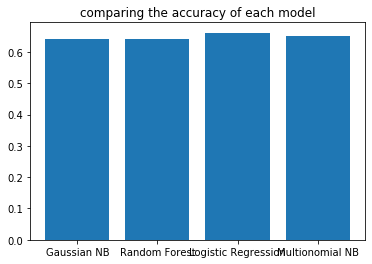

In [211]:
Accuracy = [Accuracy_RF, Accuracy_RF, Accuracy_LR,Accuracy_MNB]
Methods = ['Gaussian NB', 'Random Forest', 'Logistic Regression','Multionomial NB']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('comparing the accuracy of each model')
plt.show()

# Prediction on Test

In [216]:
test.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689459,9.44,A,10.0,2.57438,A,B,3.68000,2,NaN,46,63,Male
1,T0005689462,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,49,80,Female
2,T0005689463,10.38,C,4.0,2.70530,A,D,4.50500,0,NaN,47,74,Male
3,T0005689466,14.94,NaN,6.0,2.48159,C,E,4.53000,0,63.0,43,54,Male
4,T0005689468,32.03,B,7.0,2.81598,A,K,4.60125,3,96.0,44,56,Male


In [217]:
test.isna().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    13158
Customer_Since_Months           3966
Life_Style_Index               13327
Confidence_Life_Style_Index    13327
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           46789
Var2                               0
Var3                               0
Gender                             0
dtype: int64

In [218]:
test['Type_of_Cab'].fillna(test['Type_of_Cab'].mode()[0],inplace=True)
test['Life_Style_Index'].fillna(test['Life_Style_Index'].mode()[0],inplace=True)
test['Customer_Since_Months'].fillna(test['Customer_Since_Months'].mode()[0],inplace=True)
test['Confidence_Life_Style_Index'].fillna(test['Confidence_Life_Style_Index'].mode()[0],inplace=True)
test['Var1'].fillna(test['Var1'].mode()[0],inplace=True)

In [219]:
test.isna().sum()

Trip_ID                        0
Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
dtype: int64

In [220]:
Trip_ID=test.Trip_ID

In [221]:
test.drop(['Trip_ID'],axis=1,inplace=True)

In [222]:
test.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,9.44,A,10.0,2.57438,A,B,3.68000,2,44.0,46,63,Male
1,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,49,80,Female
2,10.38,C,4.0,2.70530,A,D,4.50500,0,44.0,47,74,Male
3,14.94,B,6.0,2.48159,C,E,4.53000,0,63.0,43,54,Male
4,32.03,B,7.0,2.81598,A,K,4.60125,3,96.0,44,56,Male


In [223]:
test=pd.get_dummies(test)

In [224]:
test.columns

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Type_of_Cab_A', 'Type_of_Cab_B', 'Type_of_Cab_C', 'Type_of_Cab_D',
       'Type_of_Cab_E', 'Confidence_Life_Style_Index_A',
       'Confidence_Life_Style_Index_B', 'Confidence_Life_Style_Index_C',
       'Destination_Type_A', 'Destination_Type_B', 'Destination_Type_C',
       'Destination_Type_D', 'Destination_Type_E', 'Destination_Type_F',
       'Destination_Type_G', 'Destination_Type_H', 'Destination_Type_I',
       'Destination_Type_J', 'Destination_Type_K', 'Destination_Type_L',
       'Destination_Type_M', 'Destination_Type_N', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

# Feature Selection in Test data as per Traning Data

In [225]:
test1=test[['Trip_Distance','Type_of_Cab_A','Cancellation_Last_1Month','Type_of_Cab_D','Type_of_Cab_B','Type_of_Cab_E']]

In [231]:
test = np.array(test)

# Prediction with Multinomial Logistic Regression Model

In [236]:
model=LogisticRegression(multi_class='multinomial', solver='newton-cg')
model.fit(x_train,y_train)
pred_test=model.predict(test1)

In [237]:
submission1=pd.DataFrame(index=Trip_ID)
submission1["Surge_Pricing_Type"]=pred_test

#Saving into csv
submission1.to_csv("Submission1.csv")

# Prediction with Random Forest Model

In [239]:
classifier = RandomForestClassifier(n_estimators = 11, criterion = 'gini', random_state = 42)
classifier.fit(x_train, y_train)
classifier_pred=classifier.predict(test1)

In [240]:
submission1=pd.DataFrame(index=Trip_ID)
submission1["Surge_Pricing_Type"]=classifier_pred

#Saving into csv
submission1.to_csv("Submission2.csv")